<center> <h2> Duffing Oscillator </h2> </center>

""" From "COMPUTATIONAL PHYSICS" & "COMPUTER PROBLEMS in PHYSICS"
    by RH Landau, MJ Paez, and CC Bordeianu (deceased).
    Copyright R Landau, Oregon State Unv, MJ Paez, Univ Antioquia, 
    C Bordeianu, Univ Bucharest, 2020. 
    Please respect copyright & acknowledge our work."""
    
Solution for Duffing oscillator equation: $$
\frac{d^2x}{dt^2}=-2\gamma  \frac{dx}{dt}-\alpha x - \beta x^3 + F\cos (\omega t).
$$ 

In [1]:
# Duffingrk4.py:  Solves ODE for Duffing Osc with rk4 & Matplotlib

import numpy as np
import matplotlib.pylab as plt          # Matplotlib for plotting
from math import *
% matplotlib notebook

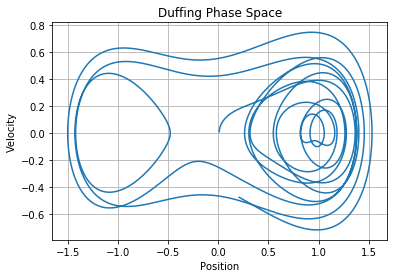

In [2]:
n = 2   # number rhs eqnts                       
tt = np.zeros((10000),float)     # All times for plots 
yy = np.zeros((10000),float)     # All positions for plots
vy = np.zeros((10000),float)     # All velocities for plots
y = [0]*(2)     # Declare array for 2 values
h = 0.01        # Time step
a = 0.01
F = 0.1
w = 1.

def f(t,y):                # RHS function                    
    rhs = np.zeros(2)
    rhs[0] = y[1]
    rhs[1] = 0.5*y[0]*(1-y[0]**2)-a*y[1]+F*cos(w*t)
    return rhs

def rk4Algor(t, h, N, y, f):
    k1=np.zeros(N); k2=np.zeros(N); k3=np.zeros(N); k4=np.zeros(N);
    k1 = h*f(t,y)                             
    k2 = h*f(t+h/2.,y+k1/2.)
    k3= h*f(t+h/2.,y+k2/2.)
    k4= h*f(t+h,y+k3)
    y=y+(k1+2*(k2+k3)+k4)/6.
    return y    

y[0] = 0.01
y[1] = 0.01
f(0.0,y)     # Call function with init conds.
i = 0
 
for t in np.arange(0,100,h):    # Time loop, store positions & velocities
    tt[i] = t
    yy[i] = y[0]
    vy[i] = y[1]
    y = rk4Algor(t, h, 2, y, f)  
    i = i+1

plt.figure()
plt.plot(yy,vy) 
plt.grid()
plt.title('Duffing Phase Space')  
plt.xlabel('Position')
plt.ylabel('Velocity')
plt.show()